# Q1 - a

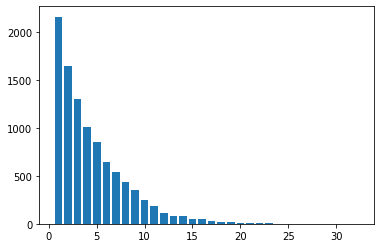

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
G = pd.read_csv('Groceries.csv',delimiter=',')
nItemPurchase = G.groupby('Customer').size()
unique_item = pd.Series.sort_index(pd.Series.value_counts(nItemPurchase))
plt.bar(unique_item.index.values,unique_item)
plt.show()

In [189]:
import numpy as np
#print(unique_item)
sum = np.sum(unique_item)
freq= unique_item.cumsum()
median = freq[freq>=sum/2].index[0]
q1 = freq[freq>=sum/4].index[0]
q3 = freq[freq>=3*(sum/4)].index[0]
print("Median",median)
print("25th percentile",q1)
print("75th percentile",q3)

Median 3
25th percentile 2
75th percentile 6


# Q1 - b

In [20]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [24]:
import pandas
ListItem = G.groupby(['Customer'])['Item'].apply(list).values.tolist()
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(ListItem).transform(ListItem)
ItemIndicator = pandas.DataFrame(te_ary, columns=te.columns_)
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(ItemIndicator, min_support = (75/sum), max_len = 4, use_colnames = True)
print(frequent_itemsets.count())


support     524
itemsets    524
dtype: int64


# Q1 - c

In [31]:
from mlxtend.frequent_patterns import association_rules
assoc_rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.01)
print(assoc_rules.count()["antecedents"])

1228


# Q1 - d

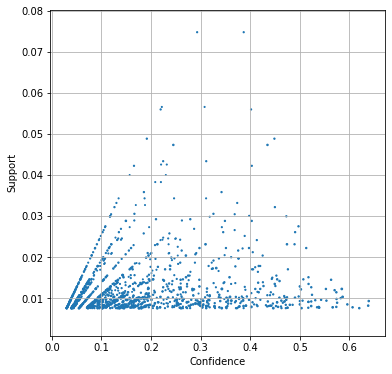

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(assoc_rules['confidence'], assoc_rules['support'], s = assoc_rules['lift'])
plt.grid(True)
plt.xlabel("Confidence")
plt.ylabel("Support")
plt.show()

# Q1 - e

In [54]:
pip install tabulate

  Using cached https://files.pythonhosted.org/packages/c4/41/523f6a05e6dc3329a5660f6a81254c6cd87e5cfb5b7482bae3391d86ec3a/tabulate-0.8.6.tar.gz
  Created wheel for tabulate: filename=tabulate-0.8.6-cp37-none-any.whl size=23279 sha256=0ce769de776a3cb5297534c59bc3b0093130a03b927a560ac1c63d02569828c2
  Stored in directory: C:\Users\segar\AppData\Local\pip\Cache\wheels\9c\9b\f4\eb243fdb89676ec00588e8c54bb54360724c06e7fafe95278e
Successfully built tabulate
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [188]:
from mlxtend.frequent_patterns import association_rules
from tabulate import tabulate
assoc_rules_greater_than_60 = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.6)
print(assoc_rules_greater_than_60)
print(" ")
print(str(assoc_rules_greater_than_60['antecedents'][0]) + " -> " + str(assoc_rules_greater_than_60['consequents'][0]))
print("Support: " + str(assoc_rules_greater_than_60['support'][0]))
print("Lift: " + str(assoc_rules_greater_than_60['lift'][0]) +"\n")
print(str(assoc_rules_greater_than_60['antecedents'][1]) + " -> " + str(assoc_rules_greater_than_60['consequents'][1]))
print("Support: " + str(assoc_rules_greater_than_60['support'][1]))
print("Lift: " + str(assoc_rules_greater_than_60['lift'][1]) +"\n")
print(str(assoc_rules_greater_than_60['antecedents'][2]) + " -> " + str(assoc_rules_greater_than_60['consequents'][2]))
print("Support: " + str(assoc_rules_greater_than_60['support'][2]))
print("Lift: " + str(assoc_rules_greater_than_60['lift'][2]) +"\n")
print(str(assoc_rules_greater_than_60['antecedents'][3]) + " -> " + str(assoc_rules_greater_than_60['consequents'][3]))
print("Support: " + str(assoc_rules_greater_than_60['support'][3]))
print("Lift: " + str(assoc_rules_greater_than_60['lift'][3]) +"\n")

                                   antecedents   consequents  \
0                    (root vegetables, butter)  (whole milk)   
1                             (butter, yogurt)  (whole milk)   
2  (root vegetables, other vegetables, yogurt)  (whole milk)   
3   (tropical fruit, other vegetables, yogurt)  (whole milk)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.012913            0.255516  0.008236    0.637795  2.496107   
1            0.014642            0.255516  0.009354    0.638889  2.500387   
2            0.012913            0.255516  0.007829    0.606299  2.372842   
3            0.012303            0.255516  0.007626    0.619835  2.425816   

   leverage  conviction  
0  0.004936    2.055423  
1  0.005613    2.061648  
2  0.004530    1.890989  
3  0.004482    1.958317  
 
frozenset({'root vegetables', 'butter'}) -> frozenset({'whole milk'})
Support: 0.008235892221657347
Lift: 2.4961068585089814

frozenset({'butter', 'yogurt'}) -> 

# Q3 - a

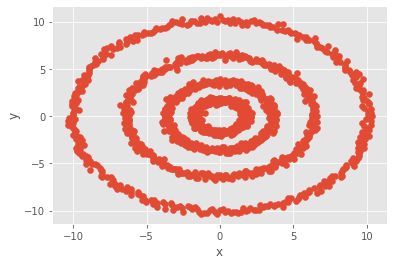

In [61]:
import pandas as pd
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn.neighbors
from matplotlib import style
Four_Circle_Data = pd.read_csv('FourCircle.csv', delimiter=',')
plt.scatter(np.array(Four_Circle_Data['x']), np.array(Four_Circle_Data['y']))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Q3 - b

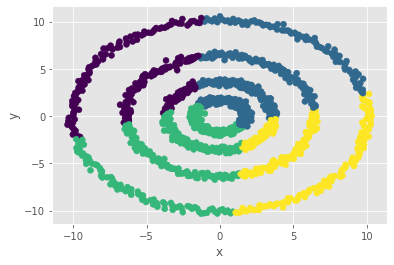

In [62]:
trainData = Four_Circle_Data[['x','y']]
kmeans = cluster.KMeans(n_clusters=4, random_state=60616).fit(trainData)
Four_Circle_Data['KMClusterLabel'] = kmeans.labels_
plt.scatter(Four_Circle_Data['x'], Four_Circle_Data['y'], c = Four_Circle_Data['KMClusterLabel'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Q3 - c 

In [68]:
import numpy

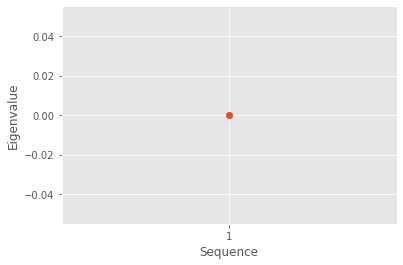

In [95]:
kNNSpec = neighbors.NearestNeighbors(n_neighbors = 1, algorithm = 'brute', metric = 'euclidean')
nbrs = kNNSpec.fit(trainData)
d3, i3 = nbrs.kneighbors(trainData)

# Retrieve the distances among the observations
distObject = neighbors.DistanceMetric.get_metric('euclidean')
distances = distObject.pairwise(trainData)

# Create the Adjacency matrix
Adjacency = numpy.zeros((nObs, nObs))
for i in range(nObs):
    for j in i3[i]:
        Adjacency[i,j] = math.exp(- (distances[i][j])**2 )

# Make the Adjacency matrix symmetric
Adjacency = 0.5 * (Adjacency + Adjacency.transpose())

# Create the Degree matrix
Degree = numpy.zeros((nObs, nObs))
for i in range(nObs):
    sum = 0
    for j in range(nObs):
        sum += Adjacency[i,j]
    Degree[i,i] = sum

# Create the Laplacian matrix        
Lmatrix = Degree - Adjacency

# Obtain the eigenvalues and the eigenvectors of the Laplacian matrix
evals, evecs = linalg.eigh(Lmatrix)

# Series plot of the smallest five eigenvalues to determine the number of clusters
sequence = numpy.arange(1,2,1) 
plt.plot(sequence, evals[0:1,], marker = "o")
plt.xlabel('Sequence')
plt.ylabel('Eigenvalue')
plt.xticks(sequence)
plt.grid("both")
plt.show()

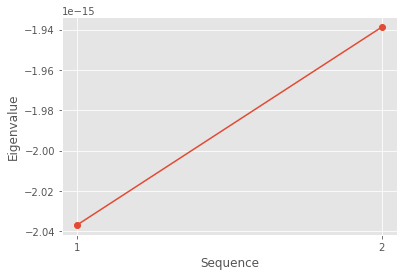

In [94]:
kNNSpec = neighbors.NearestNeighbors(n_neighbors = 2, algorithm = 'brute', metric = 'euclidean')
nbrs = kNNSpec.fit(trainData)
d3, i3 = nbrs.kneighbors(trainData)

# Retrieve the distances among the observations
distObject = neighbors.DistanceMetric.get_metric('euclidean')
distances = distObject.pairwise(trainData)

# Create the Adjacency matrix
Adjacency = numpy.zeros((nObs, nObs))
for i in range(nObs):
    for j in i3[i]:
        Adjacency[i,j] = math.exp(- (distances[i][j])**2 )

# Make the Adjacency matrix symmetric
Adjacency = 0.5 * (Adjacency + Adjacency.transpose())

# Create the Degree matrix
Degree = numpy.zeros((nObs, nObs))
for i in range(nObs):
    sum = 0
    for j in range(nObs):
        sum += Adjacency[i,j]
    Degree[i,i] = sum

# Create the Laplacian matrix        
Lmatrix = Degree - Adjacency

# Obtain the eigenvalues and the eigenvectors of the Laplacian matrix
evals, evecs = linalg.eigh(Lmatrix)

# Series plot of the smallest five eigenvalues to determine the number of clusters
sequence = numpy.arange(1,3,1) 
plt.plot(sequence, evals[0:2,], marker = "o")
plt.xlabel('Sequence')
plt.ylabel('Eigenvalue')
plt.xticks(sequence)
plt.grid("both")
plt.show()

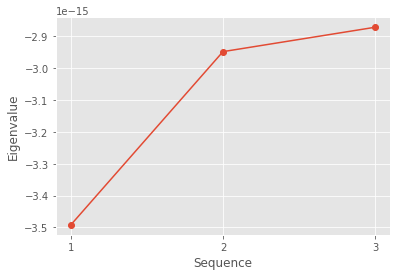

In [93]:
kNNSpec = neighbors.NearestNeighbors(n_neighbors = 3, algorithm = 'brute', metric = 'euclidean')
nbrs = kNNSpec.fit(trainData)
d3, i3 = nbrs.kneighbors(trainData)

# Retrieve the distances among the observations
distObject = neighbors.DistanceMetric.get_metric('euclidean')
distances = distObject.pairwise(trainData)

# Create the Adjacency matrix
Adjacency = numpy.zeros((nObs, nObs))
for i in range(nObs):
    for j in i3[i]:
        Adjacency[i,j] = math.exp(- (distances[i][j])**2 )

# Make the Adjacency matrix symmetric
Adjacency = 0.5 * (Adjacency + Adjacency.transpose())

# Create the Degree matrix
Degree = numpy.zeros((nObs, nObs))
for i in range(nObs):
    sum = 0
    for j in range(nObs):
        sum += Adjacency[i,j]
    Degree[i,i] = sum

# Create the Laplacian matrix        
Lmatrix = Degree - Adjacency

# Obtain the eigenvalues and the eigenvectors of the Laplacian matrix
evals, evecs = linalg.eigh(Lmatrix)

# Series plot of the smallest five eigenvalues to determine the number of clusters
sequence = numpy.arange(1,4,1) 
plt.plot(sequence, evals[0:3,], marker = "o")
plt.xlabel('Sequence')
plt.ylabel('Eigenvalue')
plt.xticks(sequence)
plt.grid("both")
plt.show()

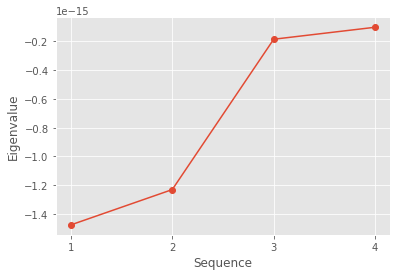

In [85]:
kNNSpec = neighbors.NearestNeighbors(n_neighbors = 4, algorithm = 'brute', metric = 'euclidean')
nbrs = kNNSpec.fit(trainData)
d3, i3 = nbrs.kneighbors(trainData)

# Retrieve the distances among the observations
distObject = neighbors.DistanceMetric.get_metric('euclidean')
distances = distObject.pairwise(trainData)

# Create the Adjacency matrix
Adjacency = numpy.zeros((nObs, nObs))
for i in range(nObs):
    for j in i3[i]:
        Adjacency[i,j] = math.exp(- (distances[i][j])**2 )

# Make the Adjacency matrix symmetric
Adjacency = 0.5 * (Adjacency + Adjacency.transpose())

# Create the Degree matrix
Degree = numpy.zeros((nObs, nObs))
for i in range(nObs):
    sum = 0
    for j in range(nObs):
        sum += Adjacency[i,j]
    Degree[i,i] = sum

# Create the Laplacian matrix        
Lmatrix = Degree - Adjacency

# Obtain the eigenvalues and the eigenvectors of the Laplacian matrix
evals, evecs = linalg.eigh(Lmatrix)

# Series plot of the smallest five eigenvalues to determine the number of clusters
sequence = numpy.arange(1,5,1) 
plt.plot(sequence, evals[0:4,], marker = "o")
plt.xlabel('Sequence')
plt.ylabel('Eigenvalue')
plt.xticks(sequence)
plt.grid("both")
plt.show()

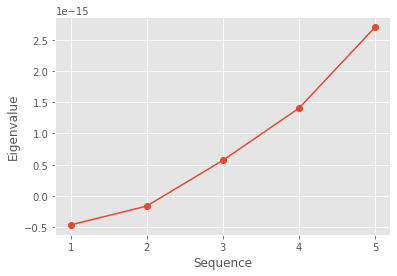

In [92]:
kNNSpec = neighbors.NearestNeighbors(n_neighbors = 5, algorithm = 'brute', metric = 'euclidean')
nbrs = kNNSpec.fit(trainData)
d3, i3 = nbrs.kneighbors(trainData)

# Retrieve the distances among the observations
distObject = neighbors.DistanceMetric.get_metric('euclidean')
distances = distObject.pairwise(trainData)

# Create the Adjacency matrix
Adjacency = numpy.zeros((nObs, nObs))
for i in range(nObs):
    for j in i3[i]:
        Adjacency[i,j] = math.exp(- (distances[i][j])**2 )

# Make the Adjacency matrix symmetric
Adjacency = 0.5 * (Adjacency + Adjacency.transpose())

# Create the Degree matrix
Degree = numpy.zeros((nObs, nObs))
for i in range(nObs):
    sum = 0
    for j in range(nObs):
        sum += Adjacency[i,j]
    Degree[i,i] = sum

# Create the Laplacian matrix        
Lmatrix = Degree - Adjacency

# Obtain the eigenvalues and the eigenvectors of the Laplacian matrix
evals, evecs = linalg.eigh(Lmatrix)

# Series plot of the smallest five eigenvalues to determine the number of clusters
sequence = numpy.arange(1,6,1) 
plt.plot(sequence, evals[0:5], marker = "o")
plt.xlabel('Sequence')
plt.ylabel('Eigenvalue')
plt.xticks(sequence)
plt.grid("both")
plt.show()

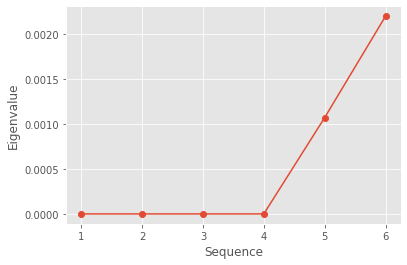

In [88]:
kNNSpec = neighbors.NearestNeighbors(n_neighbors = 6, algorithm = 'brute', metric = 'euclidean')
nbrs = kNNSpec.fit(trainData)
d3, i3 = nbrs.kneighbors(trainData)

# Retrieve the distances among the observations
distObject = neighbors.DistanceMetric.get_metric('euclidean')
distances = distObject.pairwise(trainData)

# Create the Adjacency matrix
Adjacency = numpy.zeros((nObs, nObs))
for i in range(nObs):
    for j in i3[i]:
        Adjacency[i,j] = math.exp(- (distances[i][j])**2 )

# Make the Adjacency matrix symmetric
Adjacency = 0.5 * (Adjacency + Adjacency.transpose())

# Create the Degree matrix
Degree = numpy.zeros((nObs, nObs))
for i in range(nObs):
    sum = 0
    for j in range(nObs):
        sum += Adjacency[i,j]
    Degree[i,i] = sum

# Create the Laplacian matrix        
Lmatrix = Degree - Adjacency

# Obtain the eigenvalues and the eigenvectors of the Laplacian matrix
evals, evecs = linalg.eigh(Lmatrix)

# Series plot of the smallest five eigenvalues to determine the number of clusters
sequence = numpy.arange(1,7,1) 
plt.plot(sequence, evals[0:6,], marker = "o")
plt.xlabel('Sequence')
plt.ylabel('Eigenvalue')
plt.xticks(sequence)
plt.grid("both")
plt.show()

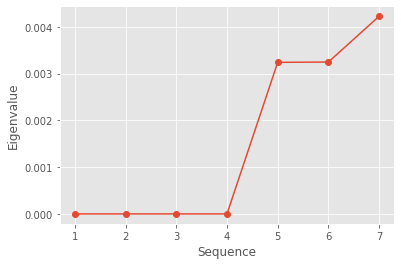

In [97]:
kNNSpec = neighbors.NearestNeighbors(n_neighbors = 7, algorithm = 'brute', metric = 'euclidean')
nbrs = kNNSpec.fit(trainData)
d3, i3 = nbrs.kneighbors(trainData)

# Retrieve the distances among the observations
distObject = neighbors.DistanceMetric.get_metric('euclidean')
distances = distObject.pairwise(trainData)

# Create the Adjacency matrix
Adjacency = numpy.zeros((nObs, nObs))
for i in range(nObs):
    for j in i3[i]:
        Adjacency[i,j] = math.exp(- (distances[i][j])**2 )

# Make the Adjacency matrix symmetric
Adjacency = 0.5 * (Adjacency + Adjacency.transpose())

# Create the Degree matrix
Degree = numpy.zeros((nObs, nObs))
for i in range(nObs):
    sum = 0
    for j in range(nObs):
        sum += Adjacency[i,j]
    Degree[i,i] = sum

# Create the Laplacian matrix        
Lmatrix = Degree - Adjacency

# Obtain the eigenvalues and the eigenvectors of the Laplacian matrix
evals, evecs = linalg.eigh(Lmatrix)

# Series plot of the smallest five eigenvalues to determine the number of clusters
sequence = numpy.arange(1,8,1) 
plt.plot(sequence, evals[0:7,], marker = "o")
plt.xlabel('Sequence')
plt.ylabel('Eigenvalue')
plt.xticks(sequence)
plt.grid("both")
plt.show()

The least number of nearest neighbours is found to be 6

# Q3 - d

In [128]:
kNNSpec = neighbors.NearestNeighbors(n_neighbors = 6, algorithm = 'brute', metric = 'euclidean')
nbrs = kNNSpec.fit(trainData)
d3, i3 = nbrs.kneighbors(trainData)

# Retrieve the distances among the observations
distObject = neighbors.DistanceMetric.get_metric('euclidean')
distances = distObject.pairwise(trainData)

# Create the Adjacency matrix
Adjacency = numpy.zeros((nObs, nObs))
for i in range(nObs):
    for j in i3[i]:
        Adjacency[i,j] = math.exp(- (distances[i][j])**2 )
Adjacency = 0.5 * (Adjacency + Adjacency.transpose())
print("Adjacency matrix: ",Adjacency)
Degree = numpy.zeros((nObs, nObs))
for i in range(nObs):
    sum = 0
    for j in range(nObs):
        sum += Adjacency[i,j]
    Degree[i,i] = sum
print("Degree matrix: ",Degree)
Lmatrix = Degree - Adjacency
print("Laplace matrix: ",Lmatrix)
evals, evecs = np.linalg.eigh(Lmatrix)
print("Eigen values: ",evals)

Adjacency matrix:  [[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.96602229 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.96602229 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
Degree matrix:  [[4.80117773 0.         0.         ... 0.         0.         0.        ]
 [0.         4.29598338 0.         ... 0.         0.         0.        ]
 [0.         0.         5.55116784 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 5.29371731 0.         0.        ]
 [0.         0.         0.         ... 0.         4.88916173 0.        ]
 [0.         0.         0.         ... 0.         0.         4.94116662]]
Laplace matrix:  [[ 3.80117773  0.          0.         ...  0.          0.
  

In [131]:
print(evals[0:5])

[-2.71880199e-15 -7.54986321e-16  5.39494176e-16  1.01317998e-15
  1.07168009e-03]


The eigev values from 1 to 4 seem to have approx zero values seen from both the print function and the graph.

# Q3 - e

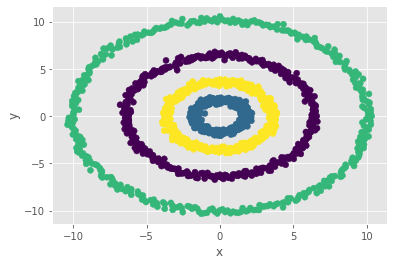

In [138]:
zero_eigen = evecs[:,[0,1,2,3,4]]
kmeans = cluster.KMeans(n_clusters=4, random_state=60616).fit(zero_eigen)
Four_Circle_Data['KMClusterLabel'] = kmeans.labels_
plt.scatter(Four_Circle_Data['x'], Four_Circle_Data['y'], c = Four_Circle_Data['KMClusterLabel'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Q2 - a

In [157]:
car = pd.read_csv('cars.csv')
Type = car['Type'].values
Origin = car['Origin'].values
DriveTrain = car['DriveTrain'].values
Cylinders = car['Cylinders'].values
print(car['Type'].unique())
print(car['DriveTrain'].unique())

['SUV' 'Sedan' 'Sports' 'Wagon' 'Truck' 'Hybrid']
['AWD' 'FWD' 'RWD']


In [190]:
Suv =0
Sedan = 0
Sports = 0
Wagon = 0
Truck = 0
Hybrid = 0
for i in Type:
    if (i=="SUV"):
        Suv=Suv+1
    elif(i=="Sedan"):
        Sedan = Sedan + 1
    elif(i=="Sports"):
        Sports = Sports + 1
    elif(i=="Wagon"):
        Wagon = Wagon + 1
    elif(i=="Truck"):
        Truck = Truck + 1
    elif(i=="Hybrid"):
        Hybrid = Hybrid + 1
print("Frequency of Suv",Suv)
print("Frequency of Sedan",Sedan)
print("Frequency of Sports",Sports)
print("Frequency of Wagon",Wagon)
print("Frequency of Truck",Truck)
print("Frequency of Hybrid",Hybrid)

Frequency of Suv 60
Frequency of Sedan 262
Frequency of Sports 49
Frequency of Wagon 30
Frequency of Truck 24
Frequency of Hybrid 3


# Q2 - b

In [191]:
AWD = 0
FWD = 0
RWD = 0
for i in DriveTrain:
    if (i=="AWD"):
        AWD=AWD+1
    elif(i=="FWD"):
        FWD = FWD + 1
    elif(i=="RWD"):
        RWD = RWD + 1
print("Frequency of AWD",AWD)
print("Frequency of FWD",FWD)
print("Frequency of RWD ",RWD)

Frequency of AWD 92
Frequency of FWD 226
Frequency of RWD  110


# Q 2 - c

In [192]:
Asia = 0
Europe = 0
print(car['Origin'].unique())
for i in Origin:
    if (i=="Asia"):
        Asia=Asia+1
    elif(i=="Europe"):
        Europe = Europe + 1
print("Frequency of Asia",Asia)
print("Frequency of Europe",Europe)
Distance_metric = ((1/Asia) + (1/Europe))
print("Distance metric",Distance_metric)

['Asia' 'Europe' 'USA']
Frequency of Asia 158
Frequency of Europe 123
Distance metric 0.014459195224863643


# Q2 - d

In [193]:
Five = 0
Missing = 0
print(car['Cylinders'].unique())
for i in Cylinders:
    if (i==5):
        Five=Five+1
    elif(np.isnan(i)):
        Missing = Missing + 1
print("Frequency of Five",Five)
print("Frequency of Missing numbers",Missing)
Distance_metric_cylinder = ((1/Five) + (1/Missing))
print("Distance metric",Distance_metric_cylinder)

[ 6.  4.  8. 10.  3. nan 12.  5.]
Frequency of Five 7
Frequency of Missing numbers 2
Distance metric 0.6428571428571428


The code for the questions 1 and 3 are referred to the code provided by Professor.